In [14]:
# Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Create connection
conn = sqlite3.connect('olist.db')

df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [3]:
# Table to DF
df_customers = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", conn)
df_orders = pd.read_sql_query("SELECT * FROM olist_order_dataset", conn)
df_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", conn)
df_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
df_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
df_sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", conn)
df_geolocation = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", conn)
df_category = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)

In [4]:
# Merge
orders_customers = pd.merge(df_orders, df_customers, on='customer_id')
orders_reviews = pd.merge(orders_customers, df_reviews, on='order_id')
orders_payments = pd.merge(orders_reviews, df_payments, on='order_id')
orders_items = pd.merge(orders_payments, df_items, on='order_id')
orders_products = pd.merge(orders_items, df_products, on='product_id')
orders_sellers = pd.merge(orders_products, df_sellers, on='seller_id')
df= pd.merge(orders_sellers, df_category, on='product_category_name')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        115609 non-null  int64  
 1   order_id                       115609 non-null  object 
 2   customer_id                    115609 non-null  object 
 3   order_status                   115609 non-null  object 
 4   order_purchase_timestamp       115609 non-null  object 
 5   order_approved_at              115595 non-null  object 
 6   order_delivered_carrier_date   114414 non-null  object 
 7   order_delivered_customer_date  113209 non-null  object 
 8   order_estimated_delivery_date  115609 non-null  object 
 9   index_y                        115609 non-null  int64  
 10  customer_unique_id             115609 non-null  object 
 11  customer_zip_code_prefix       115609 non-null  int64  
 12  customer_city                 

In [6]:
#Change Data Type
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index_x                        115609 non-null  int64         
 1   order_id                       115609 non-null  object        
 2   customer_id                    115609 non-null  object        
 3   order_status                   115609 non-null  object        
 4   order_purchase_timestamp       115609 non-null  datetime64[ns]
 5   order_approved_at              115595 non-null  datetime64[ns]
 6   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 7   order_delivered_customer_date  113209 non-null  datetime64[ns]
 8   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 9   index_y                        115609 non-null  int64         
 10  customer_unique_id             115609 non-null  object        
 11  

In [8]:
#Check missing value
missing_values = df.isnull().sum()
print(missing_values)

index_x                               0
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
index_y                               0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
index_x                               0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
index_y                               0
payment_sequential                    0
payment_type                          0
payment_installments                  0


In [9]:
#Check Duplicated Value
duplicated_val = df[df.duplicated(keep=False)]
sum_duplicated = duplicated_val.sum()
print(sum_duplicated)

index_x                          0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
index_y                          0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
index_x                          0.0
review_id                        0.0
review_score                     0.0
review_comment_title             0.0
review_comment_message           0.0
review_creation_date             0.0
review_answer_timestamp          0.0
index_y                          0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
index_x                          0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
f

In [69]:
df.drop(['index_x', 'index_y'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106915 entries, 0 to 115608
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       106915 non-null  object        
 1   customer_id                    106915 non-null  object        
 2   order_status                   106915 non-null  object        
 3   order_purchase_timestamp       106915 non-null  datetime64[ns]
 4   order_approved_at              106903 non-null  datetime64[ns]
 5   order_delivered_carrier_date   105910 non-null  datetime64[ns]
 6   order_delivered_customer_date  104837 non-null  datetime64[ns]
 7   order_estimated_delivery_date  106915 non-null  datetime64[ns]
 8   customer_unique_id             106915 non-null  object        
 9   customer_zip_code_prefix       106915 non-null  int64         
 10  customer_city                  106915 non-null  object        
 11  

In [12]:
df['price'].describe()

count    115609.000000
mean        120.619850
std         182.653476
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [17]:
price_0 = (df['price'] == 0).sum()

print("Zero values in 'price' column:", price_0)

Zero values in 'price' column: 0


Text(0.5, 1.0, 'Distribution of Price')

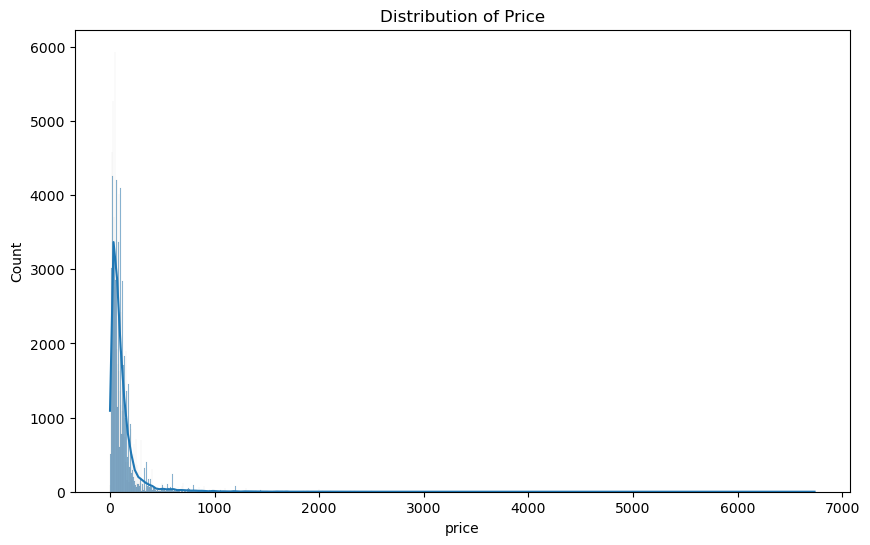

In [19]:
fig, ax = plt.subplots(figsize= (10,6))

sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')

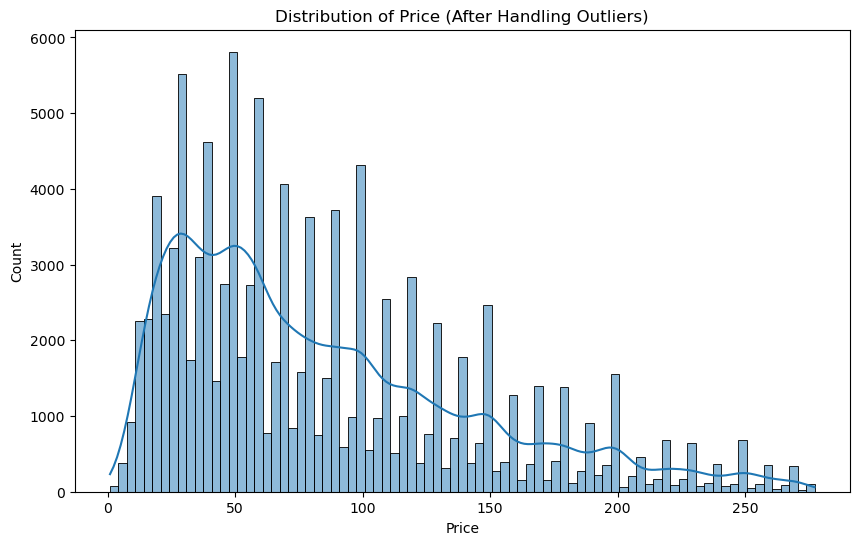

In [20]:
#Handling outlier
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers in the 'price' column
outliers = df[(df['price'] < lower) | (df['price'] > upper)]

# Drop the outliers from the DataFrame
df = df[~((df['price'] < lower) | (df['price'] > upper))]

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price (After Handling Outliers)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Data Analysis

In [48]:
unique_customers_count = df['customer_unique_id'].nunique()
print(f"The number of unique customers in the dataset is: {unique_customers_count}")


The number of unique customers in the dataset is: 85894


delivered      104837
shipped          1009
canceled          459
invoiced          307
processing        295
unavailable         5
approved            3
Name: order_status, dtype: int64


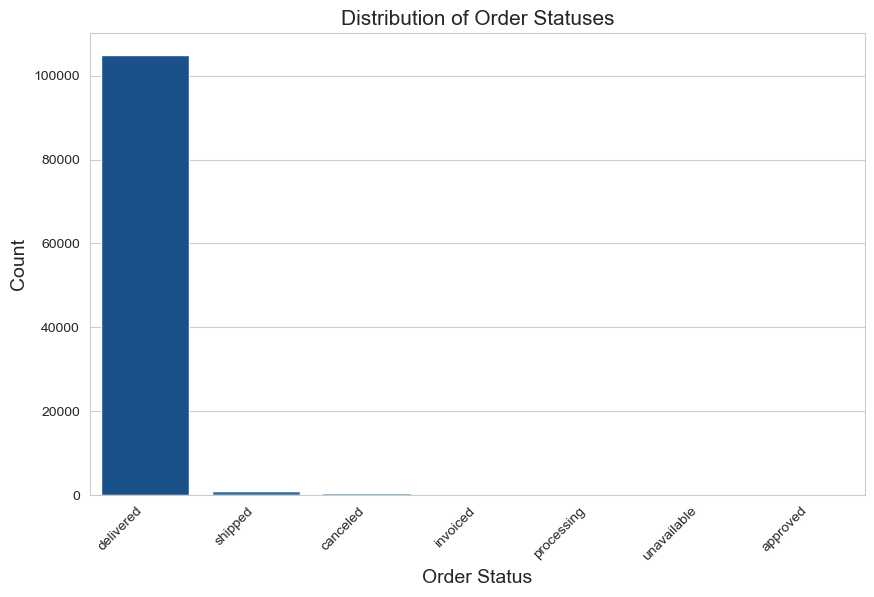

In [51]:
# Calculate the count of each order status
order_status_counts = df['order_status'].value_counts()
print(order_status_counts)

# Set the plot style
sns.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='Blues_r')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Order Statuses', fontsize=15)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

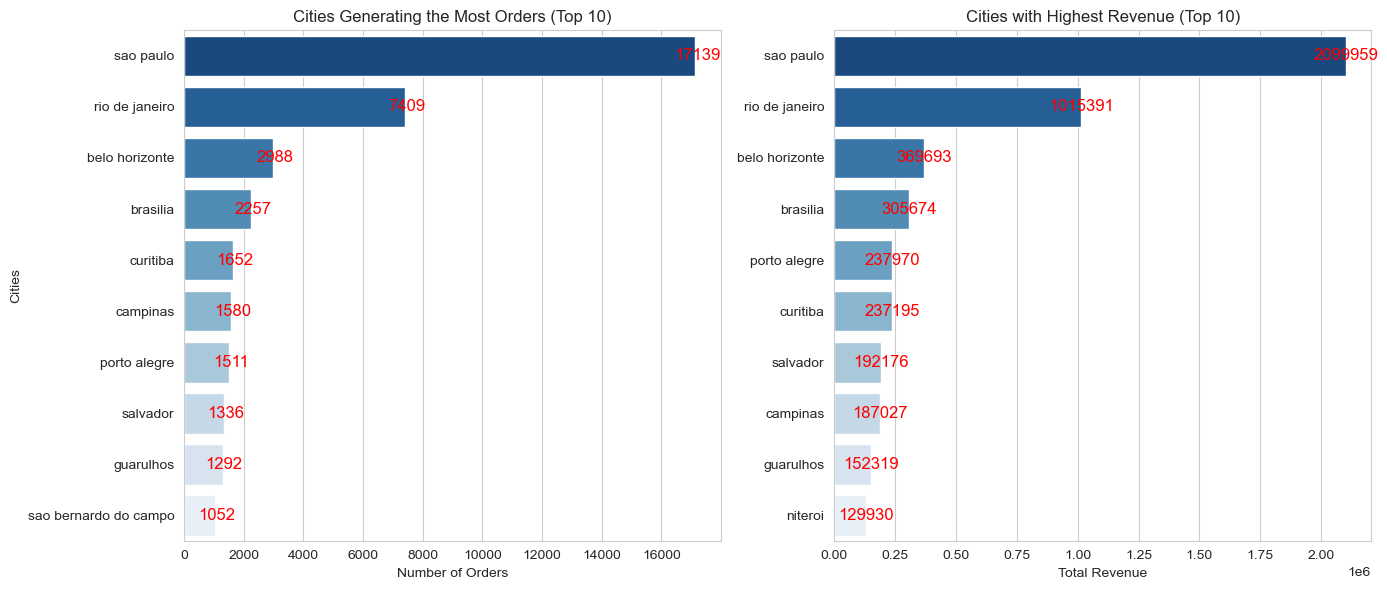

In [21]:
# Top 10 most Order by Cities
top_orders_cities = df['customer_city'].value_counts().nlargest(10)

# Top 10 highest revenue by Cities
top_revenue_cities = df.groupby('customer_city')['payment_value'].sum().nlargest(10)

# Set the plot style
sns.set_style('whitegrid')

# Create a figure and axes with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart for number of orders
sns.barplot(x=top_orders_cities, y=top_orders_cities.index, ax=ax1, palette='Blues_r')
ax1.set(xlabel='Number of Orders', ylabel='Cities', title='Cities Generating the Most Orders (Top 10)')

# Plot the bar chart for highest revenue
sns.barplot(x=top_revenue_cities, y=top_revenue_cities.index, ax=ax2, palette='Blues_r')
ax2.set(xlabel='Total Revenue', ylabel='', title='Cities with Highest Revenue (Top 10)')

# Add data labels to the bars
for ax in (ax1, ax2):
    for p in ax.patches:
        ax.text(p.get_width() + 50, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='center', va='center', fontsize=12, color='red')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

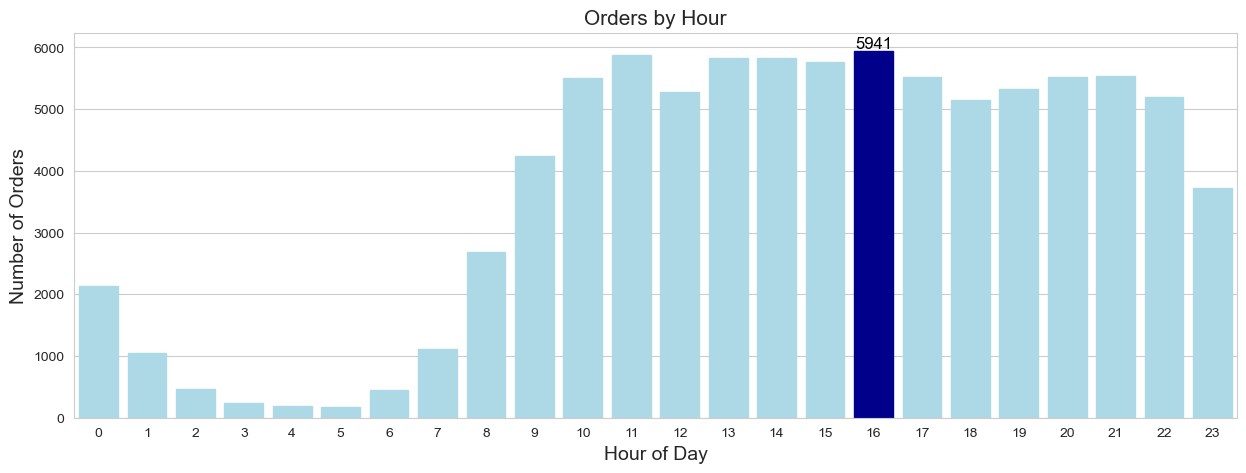

In [23]:
# Calculate the number of orders by hour of the day
orders_by_hour = df.groupby(df.order_purchase_timestamp.dt.hour)['order_id'].nunique().reset_index()

# Set the plot style
sns.set_style('whitegrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the bar chart
sns.barplot(x='order_purchase_timestamp', y='order_id', data=orders_by_hour, palette='Blues_r', ax=ax)

# Customize labels and titles
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Number of Orders', fontsize=14)
ax.set_title('Orders by Hour', fontsize=15)

# Find the highest number of orders
max_orders = orders_by_hour['order_id'].max()
for i, bar in enumerate(ax.patches):
    if orders_by_hour.loc[i, 'order_id'] == max_orders:
        bar.set_color('darkblue')
    else:
        bar.set_color('lightblue')

# Add data labels to the highest bar
for i, bar in enumerate(ax.patches):
    if orders_by_hour.loc[i, 'order_id'] == max_orders:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', color='black', fontsize=12)

# Display the plot
plt.show()

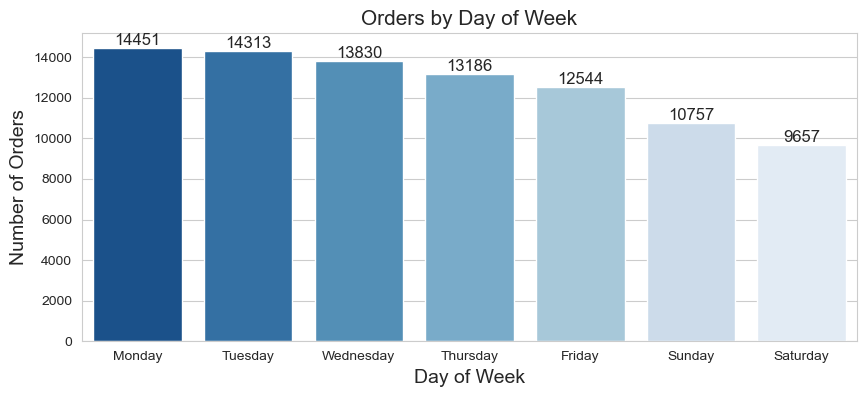

In [84]:
# Set the plot style
sns.set_style('whitegrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the bar chart
sns.barplot(x='order_purchase_timestamp', y='order_id', data=orders_by_days, palette='Blues_r', ax=ax)

# Add data labels to the bar chart
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='bottom', fontsize=12)

# Customize labels and titles
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Number of Orders', fontsize=14)
ax.set_title('Orders by Day of Week', fontsize=15)


# Display the plot
plt.show()

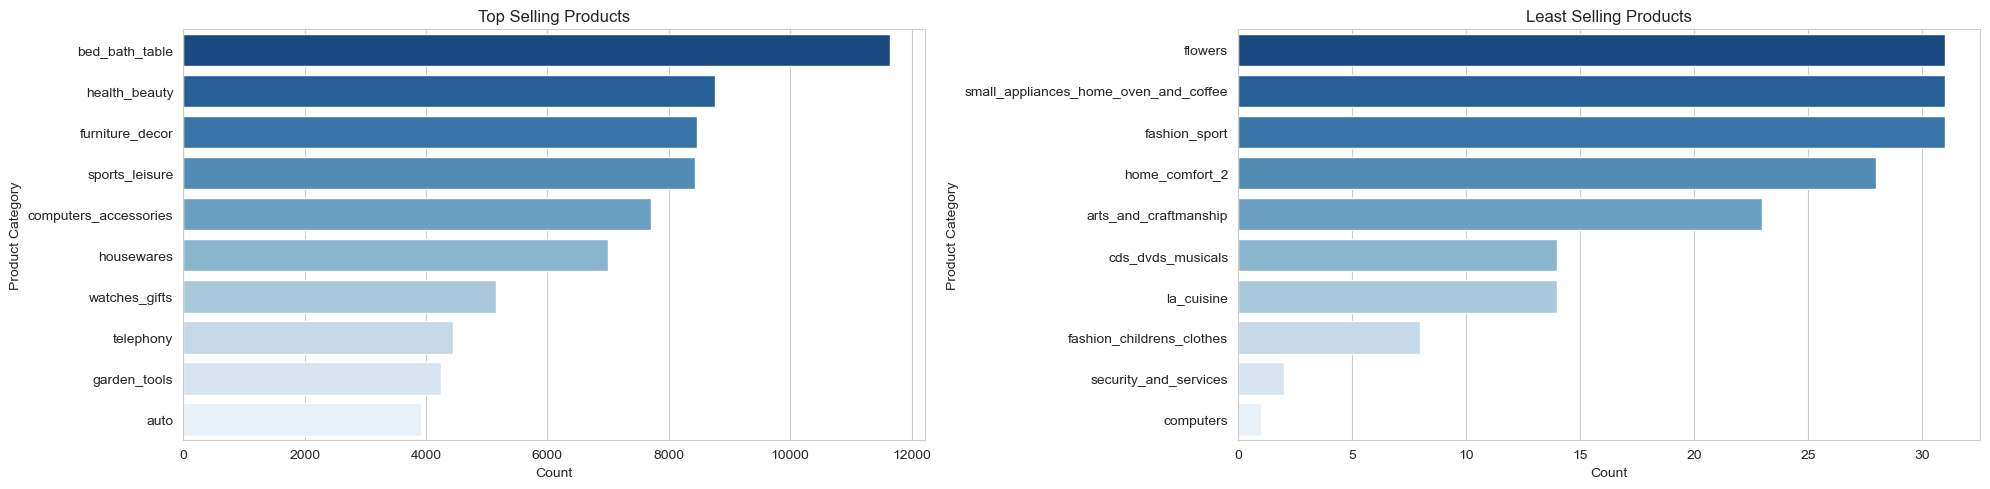

        product_category  count
0         bed_bath_table  11640
1          health_beauty   8761
2        furniture_decor   8458
3         sports_leisure   8436
4  computers_accessories   7709
5             housewares   7004
6          watches_gifts   5145
7              telephony   4451
8           garden_tools   4240
9                   auto   3923
                         product_category  count
61                                flowers     31
62  small_appliances_home_oven_and_coffee     31
63                          fashion_sport     31
64                         home_comfort_2     28
65                  arts_and_craftmanship     23
66                      cds_dvds_musicals     14
67                             la_cuisine     14
68              fashion_childrens_clothes      8
69                  security_and_services      2
70                              computers      1


In [44]:
selling_products = df["product_category_name_english"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index": "product_category", "product_category_name_english": "count"})
top = selling_products.head(10)
last = selling_products.tail(10)

# Visualize data
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=top, x="count", y="product_category", palette="Blues_r")
plt.title("Top Selling Products")
plt.xlabel("Count")
plt.ylabel("Product Category")

plt.subplot(1, 2, 2)
sns.barplot(data=last, x="count", y="product_category", palette="Blues_r")
plt.title("Least Selling Products")
plt.xlabel("Count")
plt.ylabel("Product Category")

plt.tight_layout()

# Display the plot
plt.show()

print(top)
print(last)

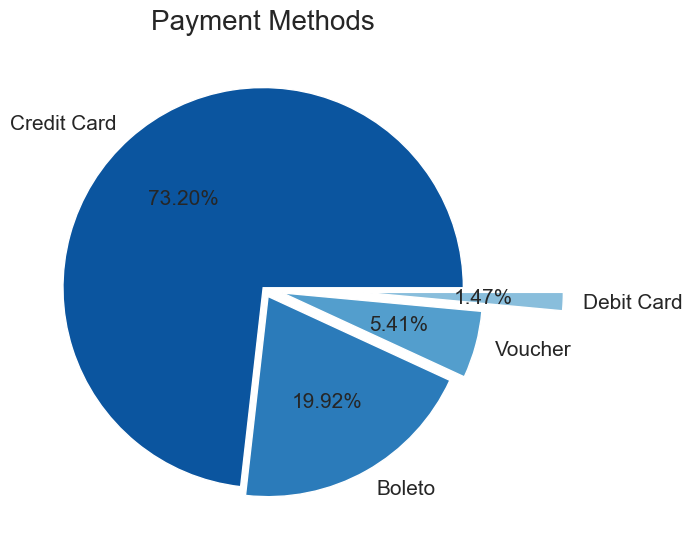

In [45]:
# Calculate the payment type counts
payment_type_counts = df.payment_type.value_counts()

# Set the plot size
plt.figure(figsize=(10, 6.5))

# Define labels and explode for the pie chart
labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']
explode = (0, 0.05, 0.1, 0.5)

# Plot the pie chart
plt.pie(x=payment_type_counts, labels=labels, autopct='%1.2f%%', explode=explode, colors=sns.color_palette('Blues_r'), textprops={'fontsize': 15})

# Set the title
plt.title('Payment Methods', fontsize=20)

# Display the plot
plt.show()

In [46]:
order_status_distribution = df['order_status'].value_counts()

print(order_status_distribution)

delivered      104837
shipped          1009
canceled          459
invoiced          307
processing        295
unavailable         5
approved            3
Name: order_status, dtype: int64


In [54]:
average_product_price = df['price'].mean()

print(f"The average product price is: {average_product_price:.2f}")

The average product price is: 83.80


The average review score given by customers is: 4.04


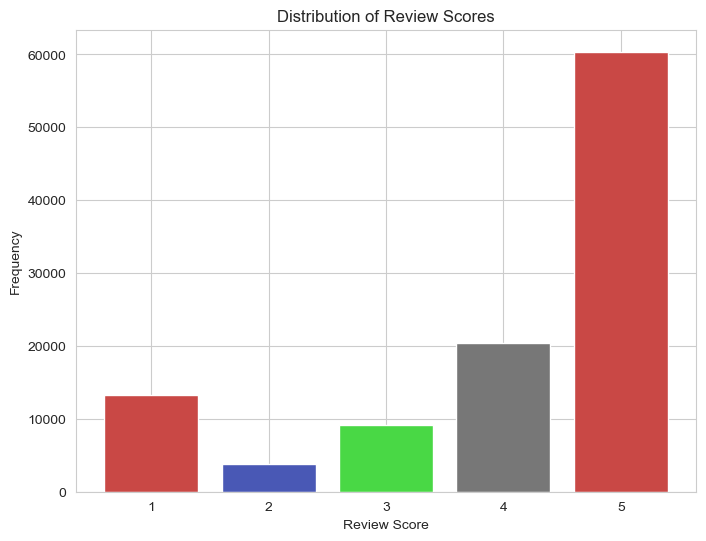

In [78]:
# Calculate the average review score
average_review_score = df['review_score'].mean()

# Print the average review score
print(f"The average review score given by customers is: {average_review_score:.2f}")

# Count the frequency of each review score
score_counts = df['review_score'].value_counts().sort_index()

# Create a bar plot of review scores
plt.figure(figsize=(8, 6))
plt.bar(score_counts.index, score_counts.values, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()
